# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

# 1. 데이터 로드 및 기본 탐색

In [1]:
import pandas as pd

# 파일 경로
file_path = 'data/mini.csv'

# 데이터셋 로드
data = pd.read_csv(file_path)

# 데이터셋의 처음 몇 행을 출력하여 구조를 확인합니다.
data.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [2]:
# 데이터셋의 기본 정보를 확인합니다 (데이터 타입, 결측치, 통계 등)
info = data.info()
describe = data.describe()

# 결측치 확인
missing_values = data.isnull().sum()

info, describe, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

(None,
        subscription_duration  recent_login_time  average_login_time  \
 count           10000.000000       10000.000000        10000.000000   
 mean               11.897400          15.013200           14.994076   
 std                 6.600896           8.362573            3.001869   
 min                 1.000000           1.000000            2.366189   
 25%                 6.000000           8.000000           13.025597   
 50%                12.000000          15.000000           14.979228   
 75%                18.000000          22.000000           16.995340   
 max                23.000000          29.000000           26.998490   
 
        average_time_per_learning_session  monthly_active_learning_days  \
 count                       10000.000000                  10000.000000   
 mean                           54.917720                     12.545400   
 std                            56.024310                      6.932239   
 min                             0.011515  

In [3]:
# 수치형 데이터와 범주형 데이터를 분리하여 기술통계를 계산합니다.

# 수치형 데이터 기술통계
numeric_data = data.select_dtypes(include=['int64', 'float64'])
numeric_describe = numeric_data.describe().transpose()

# 범주형 데이터 기술통계
categorical_data = data.select_dtypes(include=['object'])
categorical_describe = categorical_data.describe().transpose()

numeric_describe, categorical_describe


(                                     count       mean        std        min  \
 subscription_duration              10000.0  11.897400   6.600896   1.000000   
 recent_login_time                  10000.0  15.013200   8.362573   1.000000   
 average_login_time                 10000.0  14.994076   3.001869   2.366189   
 average_time_per_learning_session  10000.0  54.917720  56.024310   0.011515   
 monthly_active_learning_days       10000.0  12.545400   6.932239   1.000000   
 total_completed_courses            10000.0  12.227500   3.634125   1.000000   
 recent_learning_achievement        10000.0  75.029513   9.968529  35.941755   
 abandoned_learning_sessions        10000.0   3.043600   1.755052   0.000000   
 community_engagement_level         10000.0   3.886100   1.262175   1.000000   
 customer_inquiry_history           10000.0   2.010500   1.420983   0.000000   
 payment_pattern                    10000.0   3.502900   2.311261   0.000000   
 target                             1000

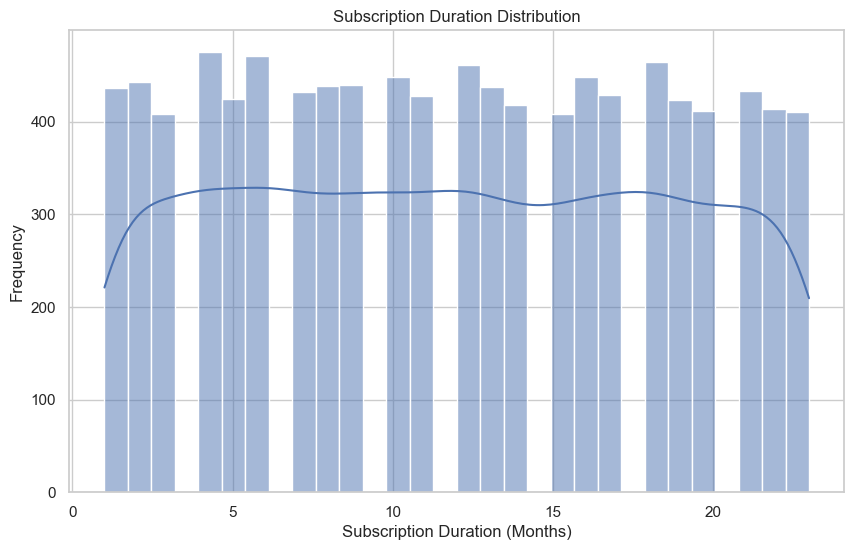

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 설정
sns.set(style="whitegrid")

# 구독 기간의 분포를 확인합니다.
plt.figure(figsize=(10, 6))
sns.histplot(data['subscription_duration'], bins=30, kde=True)
plt.title('Subscription Duration Distribution')
plt.xlabel('Subscription Duration (Months)')
plt.ylabel('Frequency')
plt.show()


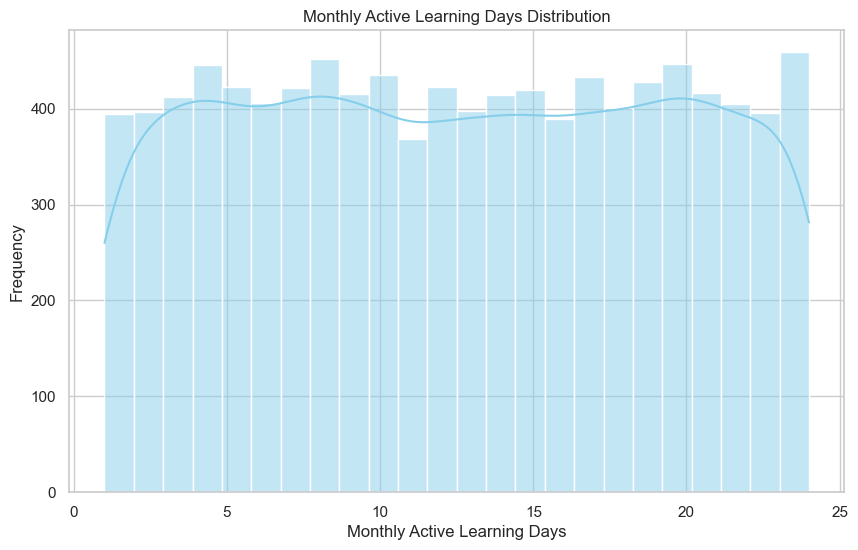

In [5]:
# 월간 활성 학습 일수의 분포를 확인합니다.
plt.figure(figsize=(10, 6))
sns.histplot(data['monthly_active_learning_days'], bins=24, kde=True, color="skyblue")
plt.title('Monthly Active Learning Days Distribution')
plt.xlabel('Monthly Active Learning Days')
plt.ylabel('Frequency')
plt.show()


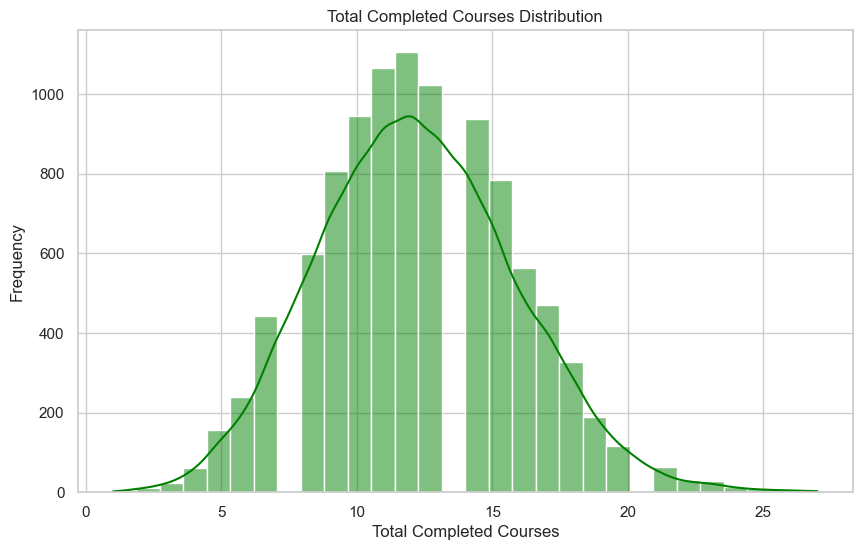

In [6]:
# 완료한 총 코스 수의 분포를 확인합니다.
plt.figure(figsize=(10, 6))
sns.histplot(data['total_completed_courses'], bins=30, kde=True, color="green")
plt.title('Total Completed Courses Distribution')
plt.xlabel('Total Completed Courses')
plt.ylabel('Frequency')
plt.show()


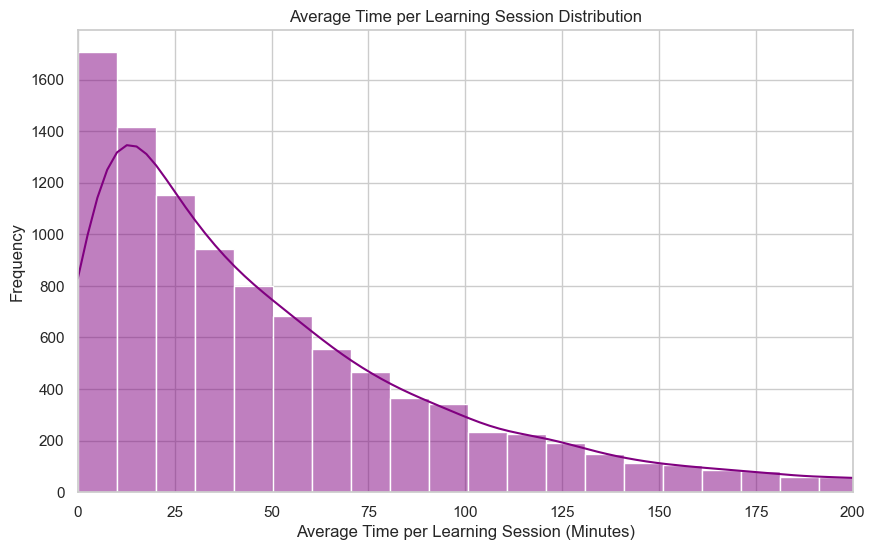

In [7]:
# 학습 세션당 평균 시간의 분포를 확인합니다.
plt.figure(figsize=(10, 6))
sns.histplot(data['average_time_per_learning_session'], bins=50, kde=True, color="purple")
plt.title('Average Time per Learning Session Distribution')
plt.xlabel('Average Time per Learning Session (Minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 200) # 이상치가 많을 것으로 예상되므로 x축 범위를 제한합니다.
plt.show()


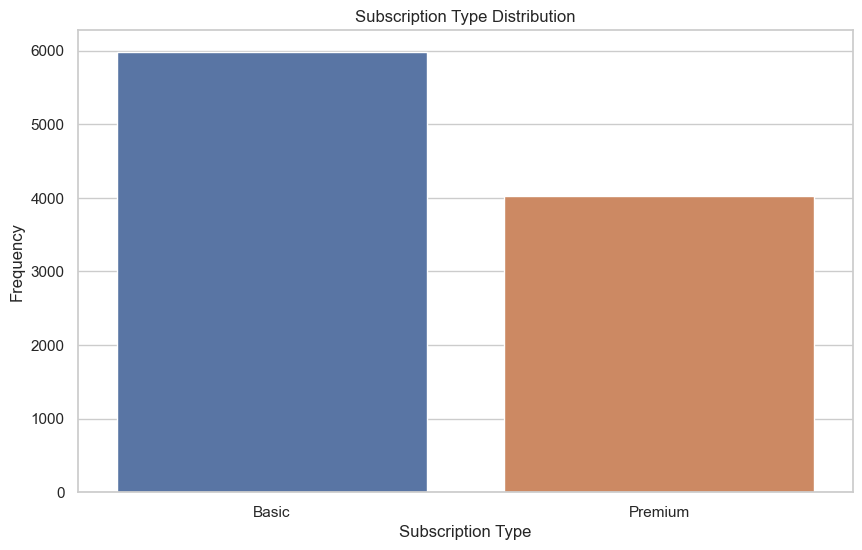

In [8]:
# 구독 유형의 분포를 확인합니다.
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='subscription_type')
plt.title('Subscription Type Distribution')
plt.xlabel('Subscription Type')
plt.ylabel('Frequency')
plt.show()


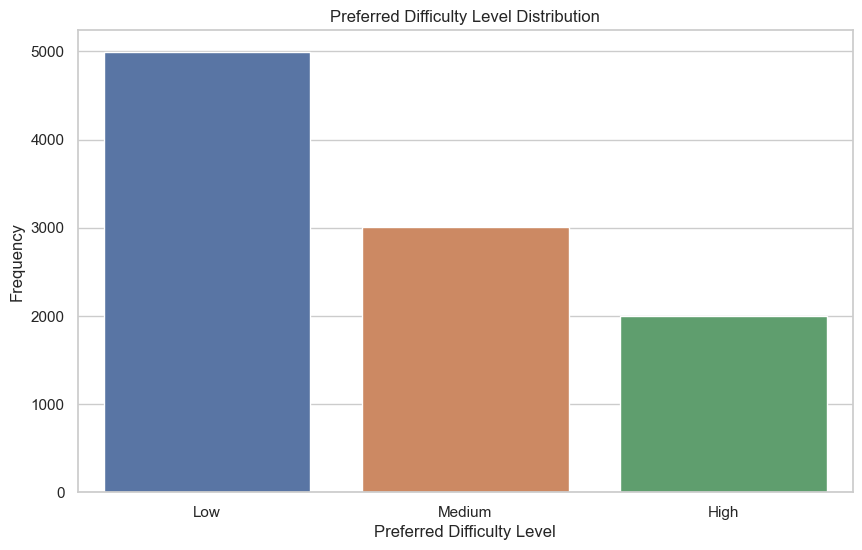

In [9]:
# 선호하는 난이도 수준의 분포를 확인합니다.
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='preferred_difficulty_level')
plt.title('Preferred Difficulty Level Distribution')
plt.xlabel('Preferred Difficulty Level')
plt.ylabel('Frequency')
plt.show()


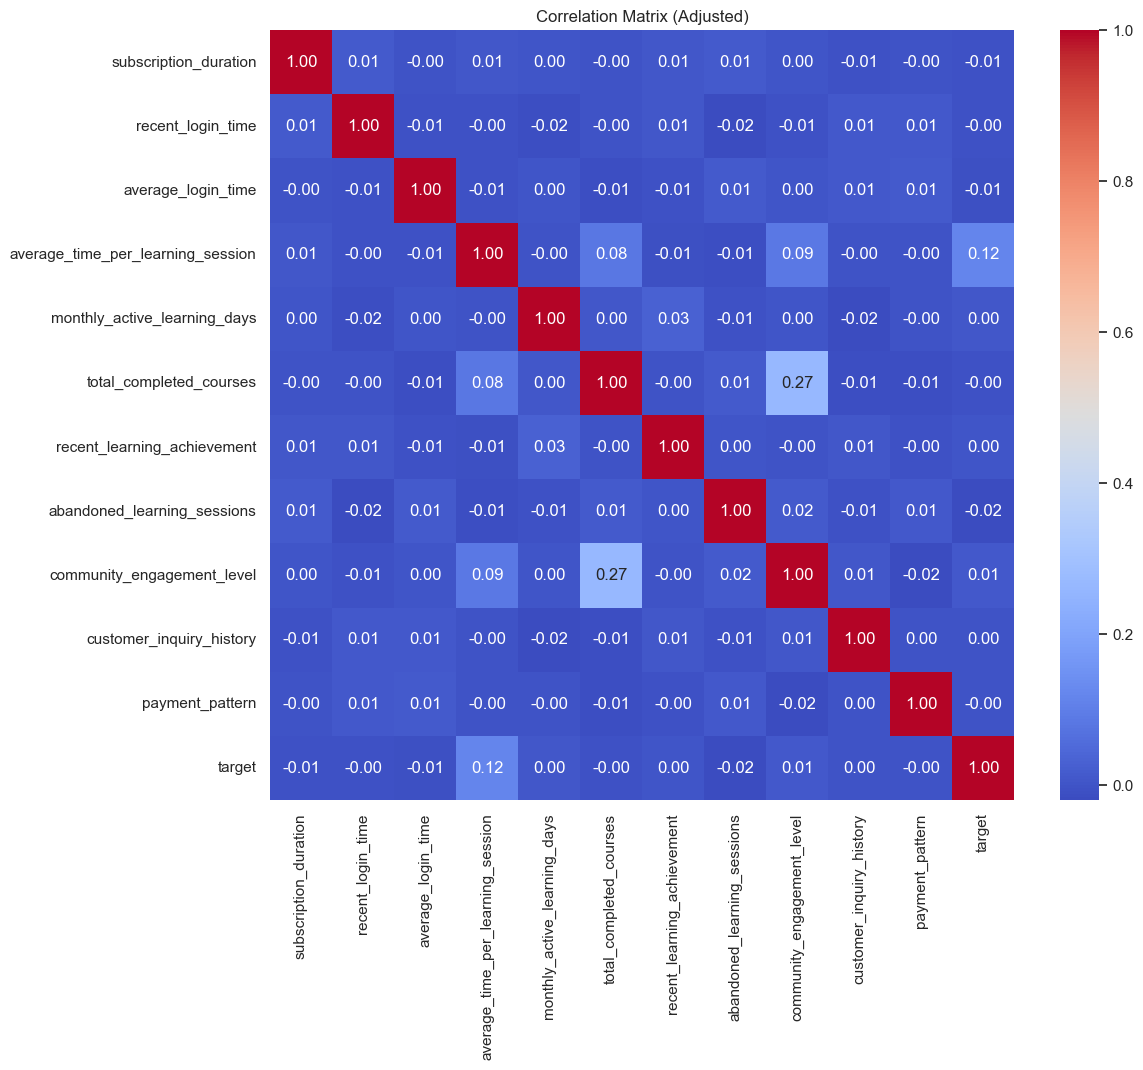

In [11]:
# 상관 행렬을 사용하여 변수들 간의 상관 관계를 분석합니다.
# 상관 행렬을 다시 생성하면서 numeric_only=True를 명시적으로 지정합니다.
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Adjusted)')
plt.show()



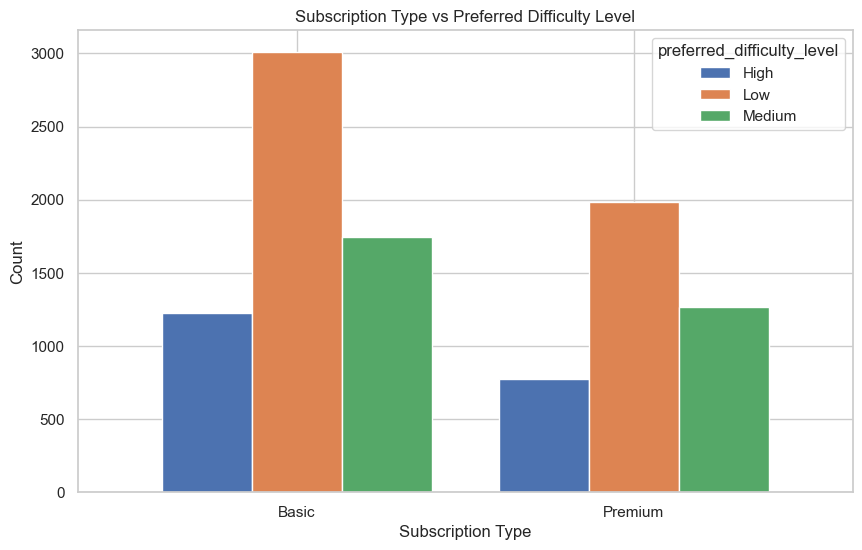

preferred_difficulty_level,High,Low,Medium
subscription_type,,,
Basic,1228,3009,1742
Premium,772,1983,1266


In [12]:
# 구독 유형과 선호하는 난이도 수준 간의 교차 분석을 수행합니다.
cross_tab = pd.crosstab(index=data['subscription_type'], columns=data['preferred_difficulty_level'])

# 교차 테이블을 시각화합니다.
cross_tab.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Subscription Type vs Preferred Difficulty Level')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

cross_tab


### 분석결과

#### 구독 유형별 콘텐츠 난이도 선호도

- Basic 구독:
     - Low 난이도 콘텐츠의 선호도가 가장 높음.
     - Medium 난이도 선호도가 High 난이도보다 높음.
     - 새로운 사용자나 초보자에게 매력적인 구독 옵션일 가능성.
- Premium 구독:
     - Low 난이도 콘텐츠의 선호도가 가장 높음.
     - Medium 난이도 선호도가 High 난이도보다 높음.
     - 상대적으로 Basic 구독 대비 Low 난이도 콘텐츠 선호도가 낮음.
     - 난이도 선호도의 일반적 경향

- 모든 사용자는 Low 난이도 콘텐츠를 가장 선호함.
- 사용자들은 너무 쉽거나 너무 어려운 콘텐츠보다는 적당한 도전을 제공하는 Medium 난이도 콘텐츠를 선호함.
